## Description ##

We will use a food delivery dataset in New York and try develop a model that allow us to do two things:


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import itertools


## **  Data Preparation **

In [2]:
# read the datafile
df = pd.read_csv("./input_data/dataset.csv", encoding="UTF-8")
df_initial = df.copy()
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (5464, 9)


In [4]:
# show first lines
display(df_initial.head())

,ID_Client,Имя,Фамилия,Email,Телефон,Дата,Услуги,Цена,Комментарии
0,10000,Илья,Григорьев,bragintit@gmail.com,+7 705 515-6238,2021-08-25,Ремонт_электрических_систем,5500,NaN
1,10001,Антон,Марков,vitali1971@gmail.com,+7 776 403-7493,2021-02-12,Замена_масла_и_фильтров Техническое_обслуживание,8500,"Очень оперативно решили проблему, завели AUDI ..."
2,10002,Никита,Кудрявцев,pahomovspartak@gmail.com,+7 771 020-6852,2021-11-09,Обслуживание_тормозной_системы,9000,NaN
3,10003,Ержан,Казаков,filaretshilov@gmail.com,+7 700 808-3592,2021-06-26,Техническое_обслуживание Шиномонтажные_услуги,5500,NaN
4,10004,Рауан,Кабанов,ufrolova@gmail.com,+7 778 995-2837,2021-10-12,Замена_масла_и_фильтров Диагностика_двигателя ...,23500,NaN


In [5]:
# show last lines
display(df_initial.tail())

,ID_Client,Имя,Фамилия,Email,Телефон,Дата,Услуги,Цена,Комментарии
5459,12503,Айдар,Тихонов,varfolome36@gmail.com,+7 777 470-3952,2023-08-03,Ремонт_электрических_систем Техническое_обслуж...,12500,NaN
5460,12572,Жандос,Калашников,aksenovgleb@gmail.com,+7 778 326-3875,2023-11-23,Замена_масла_и_фильтров Кузовной_ремонт_и_покр...,32000,NaN
5461,10740,Артем,Михайлов,kulaginatatjana@gmail.com,+7 778 930-9824,2021-02-22,Шиномонтажные_услуги Техническое_обслуживание ...,12500,NaN
5462,14022,Владислав,Орехов,anatolinikolaev@gmail.com,+7 776 421-9650,2023-08-27,Замена_масла_и_фильтров,7000,NaN
5463,11477,Асылхан,Новиков,prokofi00@gmail.com,+7 700 681-1330,2022-04-02,Техническое_обслуживание Шиномонтажные_услуги,7500,NaN


## Here the explanation about the variables:

* -...-


In [6]:
# summary of the dataframe
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Client    5464 non-null   int64 
 1   Имя          5464 non-null   object
 2   Фамилия      5464 non-null   object
 3   Email        5464 non-null   object
 4   Телефон      5464 non-null   object
 5   Дата         5464 non-null   object
 6   Услуги       5464 non-null   object
 7   Цена         5464 non-null   int64 
 8   Комментарии  732 non-null    object
dtypes: int64(2), object(7)
memory usage: 384.3+ KB


In [7]:
df_initial.describe()

,ID_Client,Цена
count,5464.000000,5464.000000
mean,12125.453331,11772.877013
std,1220.874196,9340.559104
min,10000.000000,2500.000000
25%,11072.750000,5000.000000
50%,12127.000000,7500.000000
75%,13180.000000,16500.000000
max,14498.000000,42500.000000


## **  Exploratory Data Analysis **

### Identify null values

In [8]:
tab_info = pd.DataFrame({
    'column type': df_initial.dtypes,
    'null values (nb)': df_initial.isnull().sum(),
    'null values (%)': df_initial.isnull().sum() / df_initial.shape[0] * 100
})

print('-' * 10 + " Display information about column types and number of null values " + '-' * 10)
display(tab_info)

---------- Display information about column types and number of null values ----------


,column type,null values (nb),null values (%)
ID_Client,int64,0,0.000000
Имя,object,0,0.000000
Фамилия,object,0,0.000000
Email,object,0,0.000000
Телефон,object,0,0.000000
Дата,object,0,0.000000
Услуги,object,0,0.000000
Цена,int64,0,0.000000
Комментарии,object,4732,86.603221


### Remove data entries 

In [9]:
print('Duplicate data entries: {}'.format(df_initial.duplicated().sum()))
df_initial.drop_duplicates(inplace = True)

Duplicate data entries: 66


In [11]:
print('Duplicate data entries: {}'.format(df_initial["ID_Client"].duplicated().sum()))

Duplicate data entries: 1165


### Exploring data attributes
---

#### ** Exploring the data attribute : cuisine type **

In [11]:
temp = df_initial[['customer_id', 'order_id', 'cuisine_type']].groupby(
    ['customer_id', 'order_id', 'cuisine_type']).count()
temp = temp.reset_index(drop = False)
countries = temp['cuisine_type'].value_counts()
print('No. of cuntries in dataframe: {}'.format(len(countries)))

No. of cuntries in dataframe: 14


In [23]:
temp_no_of_order_per_count = df_initial[['order_id','cuisine_type']].groupby(['cuisine_type']).count()
temp_no_of_order_per_count = temp_no_of_order_per_count.reset_index(drop = False)

print('-' * 10 + " Cuisine type number calculation "+ '-' * 10)
print
display (temp_no_of_order_per_count.sort_values(
    by='order_id', ascending=False).rename(index=str,
                                        columns={"order_id": "Number of orders", "cuisine_type": "Cuisine type"}).reset_index(drop=True))

---------- Cuisine type number calculation ----------


,Cuisine type,Number of orders
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


* Visualisation of how many orders was made in the dataframe

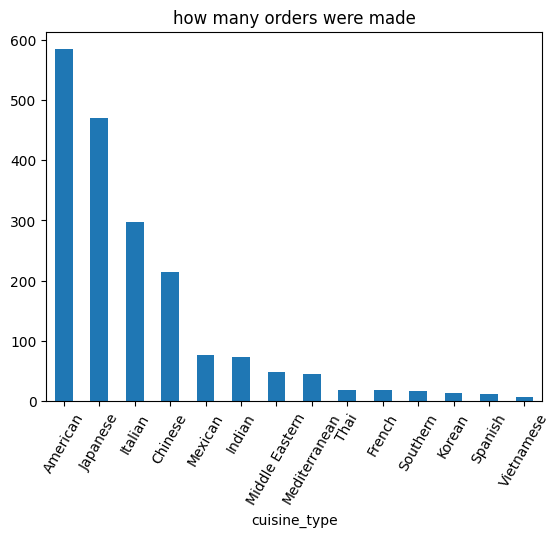

In [16]:
df_initial.cuisine_type.value_counts()
chart = df_initial.cuisine_type.value_counts().plot(kind = 'bar')
plt.title("how many orders were made")
plt.xticks(rotation = 60)
plt.show()

In [20]:
# ORDER PERCENTAGE BY TYPE OF CUSINE
display(df_initial['cuisine_type'].value_counts(normalize=True)*100)

cuisine_type
American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: proportion, dtype: float64

* Number of restaurants in each Cuisine type

In [35]:
temp_no_of_rest_per_count = df_initial.groupby('cuisine_type')['restaurant_name'].nunique().reset_index(name='Number of restaurants')
print('-' * 10 + "Restaurants number calculation "+ '-' * 10)
print()
display(temp_no_of_rest_per_count.sort_values(by='Number of restaurants', ascending=False).rename(index=str,
                                        columns={"order_id": "Number of orders", "cuisine_type": "Cuisine type"}).reset_index(drop=True))


----------Restaurants number calculation ----------



,Cuisine type,Number of restaurants
0,American,41
1,Italian,31
2,Japanese,29
3,Chinese,16
4,Indian,14
5,Mexican,11
6,Thai,9
7,Middle Eastern,7
8,Korean,5
9,Mediterranean,5


#### ** Exploring the data attribute : Customers and products **

The dataframe contains 1898 entries. What are the number of users and orders in these entries ?

In [38]:
pd.DataFrame([{'restaurants': len(df_initial['restaurant_name'].value_counts()),    
               'orders': len(df_initial['order_id'].value_counts()),
               'customers': len(df_initial['customer_id'].value_counts()),  
              }], columns = ['restaurants', 'orders', 'customers'], 
              index = ['quantity'])

,restaurants,orders,customers
quantity,178,1898,1200


As you can see that this dataset contain the recods of 1200 users who order something in 178 restaurants.
There are 1898 orders which are carried out.

Now we need to explore the number of orders in every restaurant

In [43]:
# Group the data by 'restaurant_name' and count the number of orders for each restaurant
orders_per_restaurant = df_initial.groupby('restaurant_name')['order_id'].count().reset_index()

# Sort the result by the number of orders in descending order
orders_per_restaurant = orders_per_restaurant.sort_values(by='order_id', ascending=False).reset_index(drop=True).rename(index=str,
                                        columns={"order_id": "Number of orders", "restaurant_name": "Restaurant name"})

# Display the result
print('-' * 10 + " Number of orders in every restaurant " + '-' * 10)
print()
display(orders_per_restaurant)

---------- Number of orders in every restaurant ----------



,Restaurant name,Number of orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
...,...,...
173,Klong,1
174,Kambi Ramen House,1
175,Il Bambino,1
176,Hunan Manor,1


C:\Users\WWW\AppData\Local\Temp\ipykernel_26196\1145709642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant.head(10), x="order_id", y="restaurant_name", palette=palette)


<Axes: xlabel='order_id', ylabel='restaurant_name'>

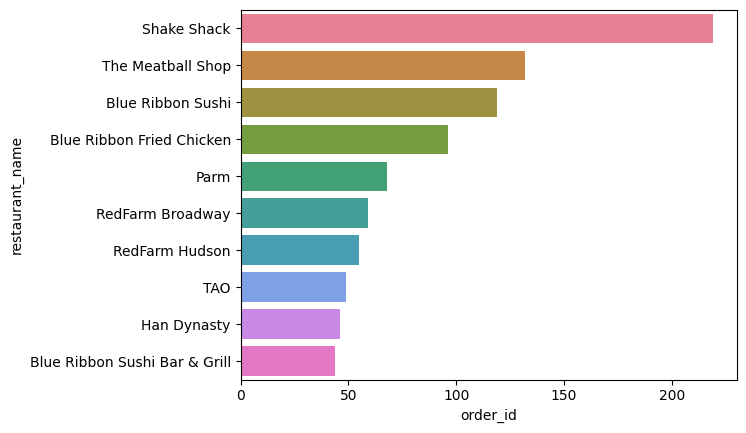

In [23]:
palette = sns.color_palette("husl", 10)
restaurant = df_initial[['restaurant_name','order_id']].groupby('restaurant_name').agg('count').sort_values('order_id', ascending=False).reset_index()
sns.barplot(data=restaurant.head(10), x="order_id", y="restaurant_name", palette=palette)

#### ** Analysis of orders that were not rated **

We need to count the number of orders that were not rated

In [12]:
no_rating_count = df_initial[df_initial['rating'] == 'Not given']['rating'].count()
total_count = len(df_initial)
percentage_no_rating = (no_rating_count / total_count) * 100
print("Percentage of reviews that were not left: {:.2f}%".format(percentage_no_rating))

Percentage of reviews that were not left: 38.78%


In [11]:
#CHECKING RATING
df_initial.rating.value_counts(normalize=True)* 100

rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64

Now let's see which restaurants have the highest ratings

In [13]:
df_cleaned = df_initial.copy()
df_cleaned = df_cleaned[df_cleaned['rating'] != 'Not given']
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
orders_per_restaurant = df_cleaned.groupby('restaurant_name')['order_id'].count().reset_index()
average_rating_per_restaurant = df_cleaned.groupby('restaurant_name')['rating'].mean().reset_index()
merged_data = pd.merge(average_rating_per_restaurant, orders_per_restaurant, on='restaurant_name', how='left')
merged_data = merged_data.sort_values(by='rating', ascending=False).reset_index(drop=True)
print('-' * 10 + " Средняя оценка и количество заказов для каждого ресторана " + '-' * 10)
print()
display(merged_data)


---------- Средняя оценка и количество заказов для каждого ресторана ----------



,restaurant_name,rating,order_id
0,'wichcraft,5.0,1
1,Ravagh Persian Grill,5.0,1
2,Chola Eclectic Indian Cuisine,5.0,1
3,Chote Nawab,5.0,1
4,Junoon,5.0,3
...,...,...,...
151,Woorijip,3.0,1
152,Byblos Restaurant,3.0,1
153,Pepe Giallo,3.0,1
154,Sushi Choshi,3.0,1


#### ** Exploring the data attribute : price per order **

* Let's look at what receipt people most often use to order food in restaurants

In [28]:
temp_no_of_rest_per_count = df_initial.groupby('cost_of_the_order')['order_id'].nunique().reset_index(name='Number of orders')
print('-' * 10 + "Restaurants number calculation "+ '-' * 10)
print()
display(temp_no_of_rest_per_count.sort_values(by='Number of orders', ascending=False).rename(index=str,
                                        columns={"order_id": "Number of orders", "cost_of_the_order": "price"}).reset_index(drop=True))


----------Restaurants number calculation ----------



,price,Number of orders
0,12.18,86
1,12.13,82
2,12.23,47
3,24.20,42
4,29.10,37
...,...,...
307,13.77,1
308,4.66,1
309,14.26,1
310,14.45,1


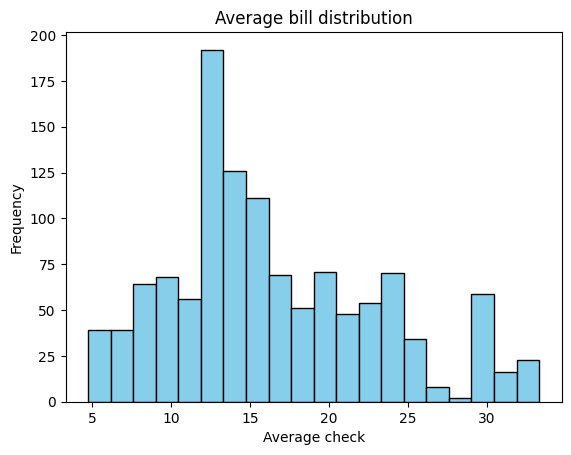

In [27]:
customer_orders = df_initial.groupby('customer_id')

customer_stats = customer_orders.agg({
    'cost_of_the_order': 'mean',  
    'order_id': 'count'  
})

customer_stats.rename(columns={'cost_of_the_order': 'average_order_value', 'order_id': 'order_frequency'}, inplace=True)
plt.hist(customer_stats['average_order_value'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average check')
plt.ylabel('Frequency')
plt.title('Average bill distribution')
plt.show()

In [7]:
df_gener = pd.read_csv("dataset.csv")
display(df_gener.head())

,Имя,Фамилия,Email,Телефон
0,Гедеон,Бобылев,kazimir_1993@gmail.com,8 140 675 37 19
1,Харлампий,Кабанова,naumsidorov@gmail.com,+7 021 627 57 46
2,Иосиф,Смирнов,platon_61@gmail.com,+7 172 299 44 39
3,Варфоломей,Лукина,serafim_28@gmail.com,+7 170 687 6301
4,Август,Быков,radislav1986@gmail.com,+7 (271) 574-0015
